# Analisis EDA

In [220]:
# Importaciones
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
# Importamos los datos
data = pd.read_csv('../Data/Salary_Data.csv')

data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


### VARIABLES:

- Age: Edad
- Gender: Sexo
- Education Level: Máxima nivel titulacion cursada
- Job Title: Nombre del trabajo que ejercen
- Years of Experience: años de experiencia
- Salary: Salario del trabajador

### Tratado de nulos

In [222]:
data.isnull().sum(), data.shape[0]

(Age                    2
 Gender                 2
 Education Level        3
 Job Title              2
 Years of Experience    3
 Salary                 5
 dtype: int64,
 6704)

Eliminamos las filas que tienen nulos ya que disponemos de muchos datos (6704) y no queremos inventarlos y crear ruido.

In [223]:
data_cleaned = data.dropna(subset=['Salary', 'Education Level'])

In [224]:
data_cleaned.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

## AGE

<Axes: xlabel='Age'>

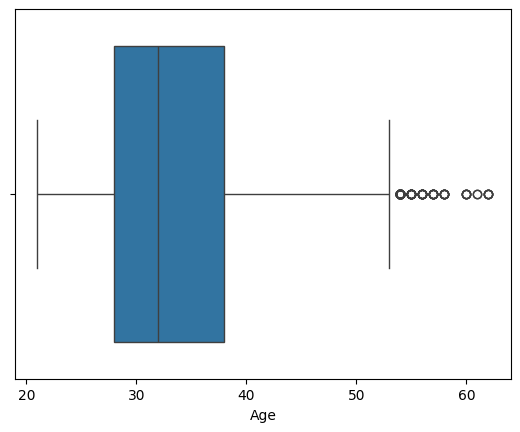

In [225]:
sns.boxplot(data=data_cleaned, x='Age')

Aunque la mayoria de los trabajores va desde los 20 años hasta los 50 años es lo normal ya que son trabajos relativamente nuevos y por tanto raro que haya gente mayor a 50 años. En este caso dejaremos los datos atipicos.

## Gender

<Axes: xlabel='Gender', ylabel='count'>

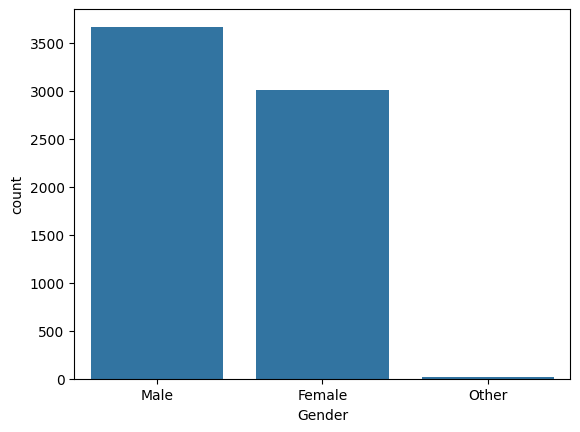

In [226]:
sns.countplot(data_cleaned, x='Gender')

## Education Level

<Axes: xlabel='Education Level', ylabel='count'>

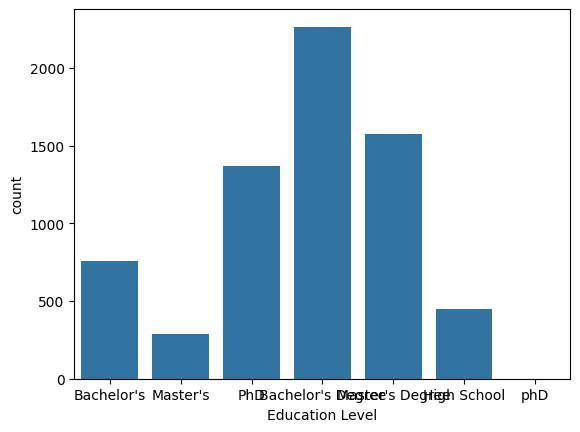

In [227]:
sns.countplot(data=data_cleaned, x='Education Level')

In [228]:
data_cleaned["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

Vamos a reescribir las variables ya que hay varias formas escritas.

In [229]:
data_cleaned["Education Level"] = data_cleaned["Education Level"].replace({'phD': 'PhD', "Bachelor's Degree": "Bachelor's", "Master's Degree": "Master's"})

C:\Users\Pau Jorques\AppData\Local\Temp\ipykernel_19624\3903775992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Education Level"] = data_cleaned["Education Level"].replace({'phD': 'PhD', "Bachelor's Degree": "Bachelor's", "Master's Degree": "Master's"})


<Axes: xlabel='Education Level', ylabel='count'>

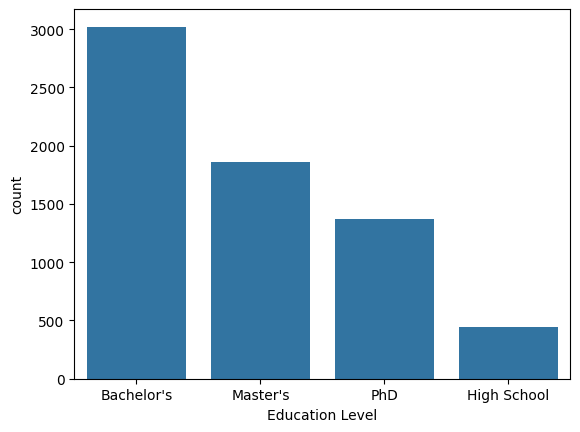

In [230]:
sns.countplot(data=data_cleaned, x='Education Level')

Hay un pequeño desbalanceo de clases. Cosa tenemos en cuenta si requiere.

## Job Title

In [231]:
data_cleaned["Job Title"].unique()[:10]

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist'], dtype=object)

In [232]:
data_cleaned['Job Title'] = data_cleaned['Job Title'].astype(str)
 
def categorize_job_title(title):
    if title.startswith('Senior'):
        return 'Senior'
    elif title.startswith('Junior'):
        return 'Junior'
    elif title.startswith('Director')|title.endswith('Director'):
        return 'Director'
    else:
        return 'Regular'
 
data_cleaned['Job Category'] = data_cleaned['Job Title'].apply(categorize_job_title)
data_cleaned['Job Title'] = data_cleaned['Job Title'].str.replace('Senior', '').str.replace('Junior', '').str.replace('Director', '').str.strip()
print(data_cleaned[['Job Title', 'Job Category']].head())

           Job Title Job Category
0  Software Engineer      Regular
1       Data Analyst      Regular
2            Manager       Senior
3    Sales Associate      Regular
4                        Director


C:\Users\Pau Jorques\AppData\Local\Temp\ipykernel_19624\4055751111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Job Title'] = data_cleaned['Job Title'].astype(str)
C:\Users\Pau Jorques\AppData\Local\Temp\ipykernel_19624\4055751111.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Job Category'] = data_cleaned['Job Title'].apply(categorize_job_title)
C:\Users\Pau Jorques\AppData\Local\Temp\ipykernel_19624\4055751111.py:14: SettingWithCopyWarning: 
A value is trying to be

<Axes: xlabel='Job Category', ylabel='count'>

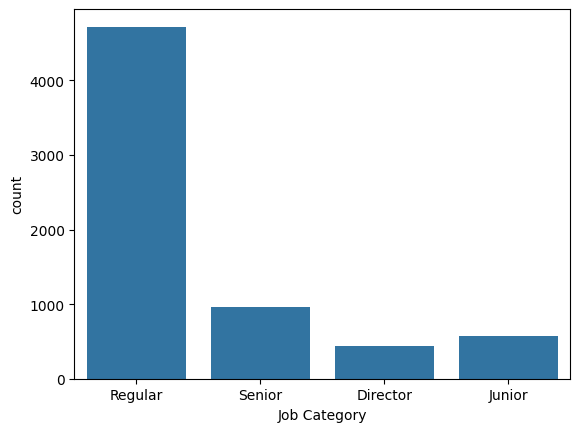

In [233]:
sns.countplot(data=data_cleaned, x='Job Category')

In [234]:
data_cleaned['Job Title'].value_counts()

Job Title
Software Engineer              813
Data Scientist                 515
Data Analyst                   391
Software Engineer Manager      376
Product Manager                323
                              ... 
Customer Support Specialist      1
VP of Finance                    1
of Product Management            1
CEO                              1
Human Resources                  1
Name: count, Length: 129, dtype: int64

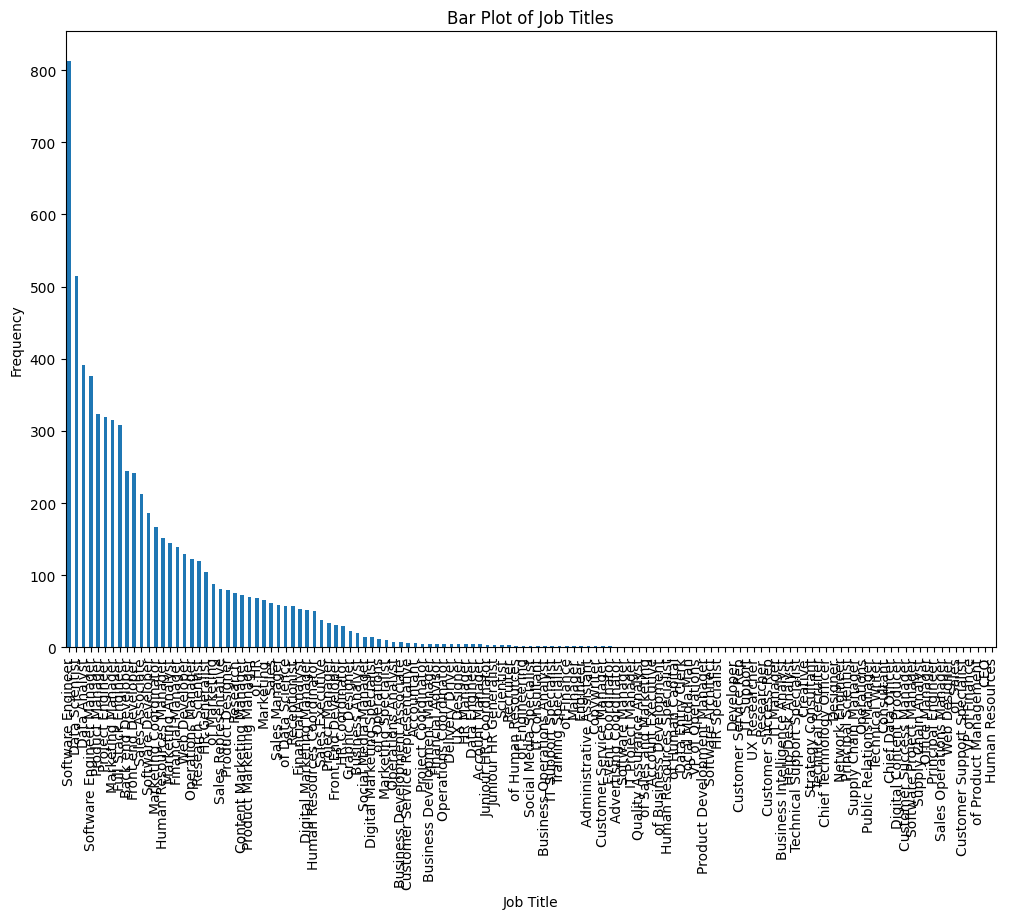

In [235]:
plt.figure(figsize=(12, 8))
data_cleaned['Job Title'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

## Years Of Experience

<Axes: xlabel='Years of Experience'>

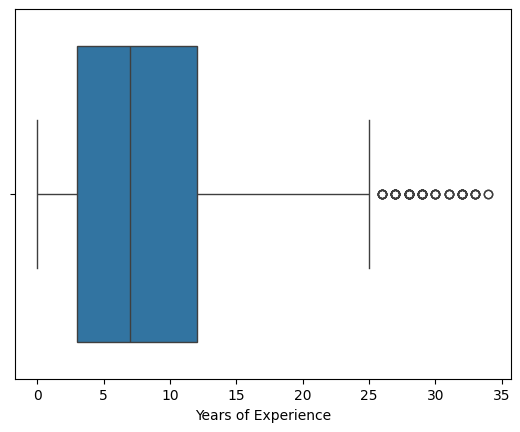

In [236]:
sns.boxplot(data=data_cleaned, x="Years of Experience")

Lo mismo con la edad.

## Salary

<Axes: xlabel='Years of Experience', ylabel='Salary'>

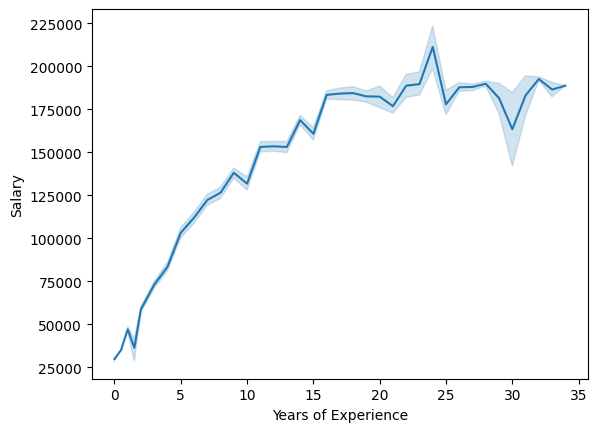

In [237]:
sns.lineplot(data=data_cleaned, x="Years of Experience", y="Salary")

<Axes: xlabel='Age', ylabel='Salary'>

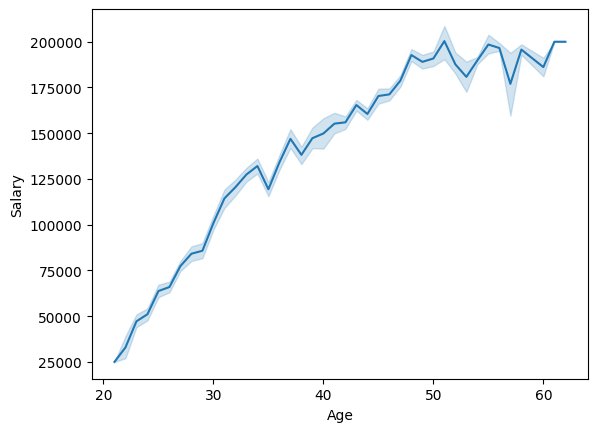

In [238]:
sns.lineplot(data=data_cleaned, x="Age", y="Salary")

C:\Users\Pau Jorques\AppData\Local\Temp\ipykernel_19624\3857154125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Salary', data=data_cleaned, palette='viridis')


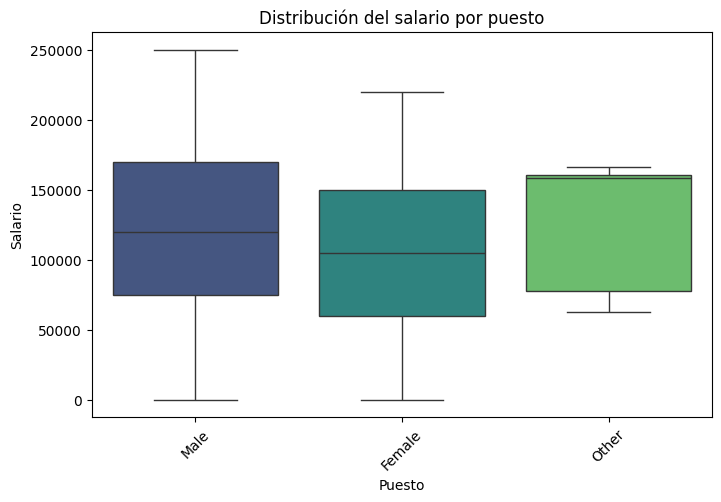

In [239]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Salary', data=data_cleaned, palette='viridis')
plt.title('Distribución del salario por puesto')
plt.xlabel('Puesto')
plt.ylabel('Salario')
plt.xticks(rotation=45)
plt.show()

C:\Users\Pau Jorques\AppData\Local\Temp\ipykernel_19624\1596706557.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job Category', y='Salary', data=data_cleaned, palette='viridis')


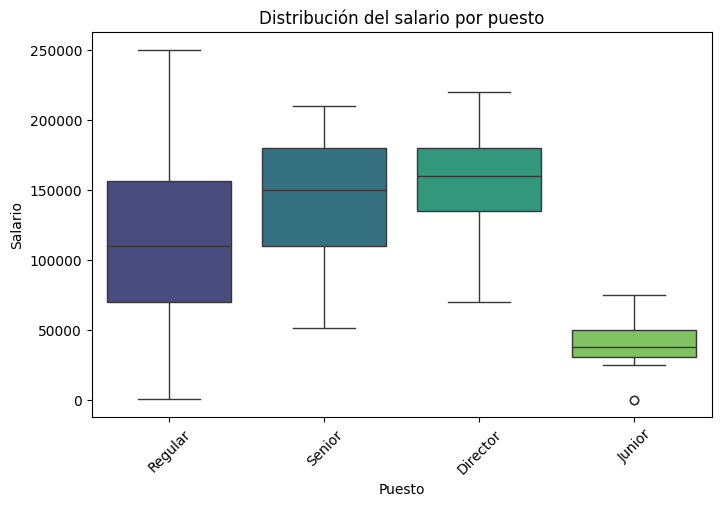

In [240]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Job Category', y='Salary', data=data_cleaned, palette='viridis')
plt.title('Distribución del salario por puesto')
plt.xlabel('Puesto')
plt.ylabel('Salario')
plt.xticks(rotation=45)
plt.show()

In [241]:
data_cleaned[(data_cleaned["Salary"]<25000) & (data_cleaned["Salary"]>0)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Job Category
259,29.0,Male,Bachelor's,Business Operations Analyst,1.5,350.0,Junior
1890,25.0,Female,Bachelor's,Front end Developer,1.0,550.0,Regular
2654,23.0,Male,PhD,Software Engineer Manager,1.0,579.0,Regular
4633,31.0,Female,Bachelor's,HR Coordinator,4.0,500.0,Junior


Vamos a eliminar estos datos incorrectos.

In [242]:
# Identificar las filas que cumplen la condición
condicion = (data_cleaned["Salary"] < 25000) & (data_cleaned["Salary"] > 0)

# Eliminar las filas que cumplen la condición
data_cleaned = data_cleaned.drop(data_cleaned[condicion].index)

# Reiniciar el índice si es necesario
data_cleaned = data_cleaned.reset_index(drop=True)

In [243]:
data_cleaned[(data_cleaned["Salary"]<25000) & (data_cleaned["Salary"]>0)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Job Category


Exportamos los datos limpios a un csv

In [244]:
data_cleaned.to_csv("./data_cleaned/Salary_Data_Cleaned.csv", index=False)

In [272]:
dataaaa = pd.read_csv("data_cleaned\Categorized_Job_Types.csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Pau Jorques\AppData\Local\Temp\ipykernel_19624\879076474.py:1: SyntaxWarning: invalid escape sequence '\C'
  dataaaa = pd.read_csv("data_cleaned\Categorized_Job_Types.csv")


In [273]:
dataaaa["Job Type"].value_counts()

Job Type
Software & IT             2659
Management                1379
Data & Analytics          1318
Sales & Marketing          748
Human Resources            266
Design & Creative          111
Other                       85
Science & Research          76
Operations & Logistics      18
Finance & Accounting        14
Customer Service            12
Consulting                   4
Writing & Journalism         3
Unknown                      1
Name: count, dtype: int64

In [247]:
dataaaa = pd.read_csv("data_cleaned\Salary_Data_No_Other_Job_Types.csv")

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Pau Jorques\AppData\Local\Temp\ipykernel_19624\2316181599.py:1: SyntaxWarning: invalid escape sequence '\S'
  dataaaa = pd.read_csv("data_cleaned\Salary_Data_No_Other_Job_Types.csv")


In [274]:
dataaaa["Job Type"].value_counts()

Job Type
Software & IT             2659
Management                1379
Data & Analytics          1318
Sales & Marketing          748
Human Resources            266
Design & Creative          111
Other                       85
Science & Research          76
Operations & Logistics      18
Finance & Accounting        14
Customer Service            12
Consulting                   4
Writing & Journalism         3
Unknown                      1
Name: count, dtype: int64

In [276]:
dataaaa[dataaaa["Job Type"]=="Software & IT"]["Job Title"].value_counts()

Job Title
Software Engineer            813
Software Engineer Manager    375
Project Engineer             319
Full Stack Engineer          308
Back end Developer           244
Front end Developer          240
Software Developer           186
Web Developer                129
Front End Developer           31
Data Engineer                  4
of Engineering                 2
Engineer                       2
Software Project Manager       1
Software Architect             1
Network Engineer               1
Developer                      1
Software Manager               1
Principal Engineer             1
Name: count, dtype: int64

In [277]:
dataaaa[dataaaa["Job Type"]=="Management"]["Job Title"].value_counts()

Job Title
Product Manager                 323
Marketing Manager               315
Human Resources Manager         152
Financial Manager               139
Operations Manager              122
Content Marketing Manager        73
Product Marketing Manager        70
Sales Manager                    58
Digital Marketing Manager        52
Project Manager                  34
Social Media Manager             15
HR Manager                        5
Business Development Manager      5
Account Manager                   4
Manager                           2
Customer Service Manager          2
IT Project Manager                1
Office Manager                    1
Sales Operations Manager          1
IT Manager                        1
Customer Success Manager          1
Public Relations Manager          1
Supply Chain Manager              1
Product Development Manager       1
Name: count, dtype: int64

In [278]:
dataaaa[dataaaa["Job Type"]=="Data & Analytics"]["Job Title"].value_counts()

Job Title
Data Scientist                   515
Data Analyst                     391
Marketing Analyst                144
Research Scientist               119
of Data Science                   57
Financial Analyst                 53
Business Analyst                  20
Operations Analyst                 8
Scientist                          3
Data Entry Clerk                   1
Help Desk Analyst                  1
Principal Scientist                1
Chief Data Officer                 1
Supply Chain Analyst               1
Quality Assurance Analyst          1
Business Operations Analyst        1
Business Intelligence Analyst      1
Name: count, dtype: int64

In [279]:
dataaaa[dataaaa["Job Type"]=="Sales & Marketing"]["Job Title"].value_counts()

Job Title
Sales Associate                   212
Marketing Coordinator             167
of Marketing                       88
Sales Representative               81
Marketing                          65
Sales                              62
Sales Executive                    38
Digital Marketing Specialist       15
Marketing Specialist               10
Business Development Associate      7
of Sales                            1
of Sales and Marketing              1
of Business Development             1
Name: count, dtype: int64

In [280]:
dataaaa[dataaaa["Job Type"]=="Human Resources"]["Job Title"].value_counts()

Job Title
HR Generalist                  104
of HR                           69
Human Resources Coordinator     50
HR Coordinator                  28
Recruiter                        3
Juniour HR Generalist            3
Juniour HR Coordinator           3
of Human Resources               2
Human Resources                  1
Technical Recruiter              1
Human Resources Specialist       1
HR Specialist                    1
Name: count, dtype: int64

In [281]:
dataaaa[dataaaa["Job Type"]=="Design & Creative"]["Job Title"].value_counts()

Job Title
Product Designer    80
Graphic Designer    23
UX Designer          5
UX Researcher        1
Designer             1
Web Designer         1
Name: count, dtype: int64

In [282]:
dataaaa[dataaaa["Job Type"]=="Other"]["Job Title"].value_counts()

Job Title
Receptionist                57
Project Coordinator          5
Delivery Driver              5
Administrative Assistant     2
Event Coordinator            2
Training Specialist          2
Social Media Specialist      2
Creative                     1
Chief Technology Officer     1
CEO                          1
Digital Content Producer     1
of Product Management        1
Account Executive            1
of Human Capital             1
Advertising Coordinator      1
Customer Success Rep         1
Social Media Man             1
Name: count, dtype: int64

In [283]:
dataaaa[dataaaa["Job Type"]=="Science & Research"]["Job Title"].value_counts()

Job Title
Research      75
Researcher     1
Name: count, dtype: int64

In [284]:
dataaaa[dataaaa["Job Type"]=="Operations & Logistics"]["Job Title"].value_counts()

Job Title
of Operations             11
Operations Coordinator     5
VP of Operations           1
Operations                 1
Name: count, dtype: int64

In [285]:
dataaaa[dataaaa["Job Type"]=="Finance & Accounting"]["Job Title"].value_counts()

Job Title
Accountant           6
Financial Advisor    5
of Finance           2
VP of Finance        1
Name: count, dtype: int64

In [286]:
dataaaa[dataaaa["Job Type"]=="Customer Service"]["Job Title"].value_counts()

Job Title
Customer Service Representative    6
IT Support Specialist              2
Customer Service Rep               1
IT Support                         1
Technical Support Specialist       1
Customer Support Specialist        1
Name: count, dtype: int64

In [287]:
dataaaa[dataaaa["Job Type"]=="Consulting"]["Job Title"].value_counts()

Job Title
IT Consultant          2
Consultant             1
Strategy Consultant    1
Name: count, dtype: int64

In [288]:
dataaaa[dataaaa["Job Type"]=="Writing & Journalism"]["Job Title"].value_counts()

Job Title
Copywriter          2
Technical Writer    1
Name: count, dtype: int64

In [290]:
dataaaa[dataaaa["Job Type"]=="Unknown"]["Job Title"].value_counts()

Series([], Name: count, dtype: int64)

In [291]:
dataaaa.to_csv("../Data/salary_data_pau.csv")